In [1]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import time
import torch
from feedforward import DQNAgent
import pylab as plt
# %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import hockey.hockey_env as h_env
print("hi")

hi


## Helper Functions

In [2]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
# class DiscreteActionWrapper(gym.ActionWrapper):
#     def __init__(self, env: gym.Env, bins = 8):
#         """A wrapper for converting a 1D continuous actions into discrete ones.
#         Args:
#             env: The environment to apply the wrapper
#             bins: number of discrete actions
#         """
#         assert isinstance(env.action_space, spaces.Box)
#         super().__init__(env)
#         self.bins = bins
#         self.orig_action_space = env.action_space
#         self.action_space = spaces.Discrete(self.bins)


#     def action(self, action):
#         """ discrete actions from low to high in 'bins'
#         Args:
#             action: The discrete action
#         Returns:
#             continuous action
#         """
#         # return self.orig_action_space.low + action/(self.bins-1.0)*(self.orig_action_space.high-self.orig_action_space.low)
#         return h_env.HockeyEnv.discrete_to_continous_action(self, action)

## Test in Env

In [4]:
# env_name = 'Pendulum-v1'
# # env_name = 'CartPole-v0'
# env = gym.make(env_name)

env = h_env.HockeyEnv()
env.discretize_actions(8)

# if isinstance(env.action_space, spaces.Box):
#     print("Discretizing actions")
#     env = DiscreteActionWrapper(env)

ac_space = env.action_space
o_space = env.observation_space

In [5]:
print(ac_space)
print(o_space)

Discrete(8)
Box(-inf, inf, (18,), float32)


In [6]:
env.keep_mode

True

In [7]:
q_agent = DQNAgent(o_space, ac_space, eps=0.2, update_Qt_after=20)

Train the agent!

In [11]:
stats = []
losses = []

max_episodes=600
max_steps=500 
for i in range(max_episodes):
    # print("Starting a new episode")    
    total_reward = 0
    ob, _info = env.reset()
    for t in range(max_steps):      # fill buffer
        done = False        
        qa = q_agent.act(ob)
        a1 = env.action(qa)
        a2 = np.random.uniform(-1,1,4)
        (ob_new, reward, done, trunc, _info) = env.step(np.hstack([a1,a2]))
        total_reward+= reward
        q_agent.store_transition((ob, qa, reward, ob_new, done))            
        ob=ob_new        
        if done: break    
    losses.extend(q_agent.train(32))
    stats.append([i,total_reward,t+1])    
    
    if ((i-1)%20==0):
        print("{}: Done after {} steps. Reward: {}".format(i, t+1, total_reward))

1: Done after 251 steps. Reward: 0.0
21: Done after 102 steps. Reward: 7.821876679596903
41: Done after 194 steps. Reward: 6.828329256929022
61: Done after 251 steps. Reward: 0.0
81: Done after 251 steps. Reward: 0.0
101: Done after 251 steps. Reward: 0.0
121: Done after 251 steps. Reward: -15.023735704618138
141: Done after 91 steps. Reward: 8.471384505324124
161: Done after 251 steps. Reward: -8.922557310778663
181: Done after 251 steps. Reward: 0.0
201: Done after 91 steps. Reward: -11.586581696031185
221: Done after 251 steps. Reward: 0.0
241: Done after 251 steps. Reward: 0.0
261: Done after 96 steps. Reward: 9.649221824720117
281: Done after 251 steps. Reward: 0.0
301: Done after 251 steps. Reward: -7.540374164403832
321: Done after 237 steps. Reward: 8.891818047265131
341: Done after 251 steps. Reward: 0.0
361: Done after 251 steps. Reward: 0.0
381: Done after 251 steps. Reward: 0.0
401: Done after 220 steps. Reward: 6.762541848543251
421: Done after 251 steps. Reward: 0.0
441: 

Plot the training reward over time. Use the running_mean(array, window_size) to plot a smooth version 

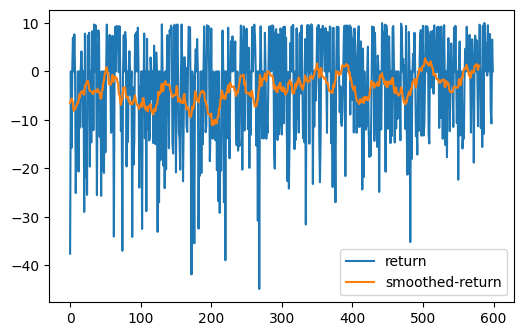

In [12]:
stats_np = np.asarray(stats)
fig=plt.figure(figsize=(6,3.8))
plt.plot(stats_np[:,1], label="return")
plt.plot(running_mean(stats_np[:,1],20), label="smoothed-return")
plt.legend()

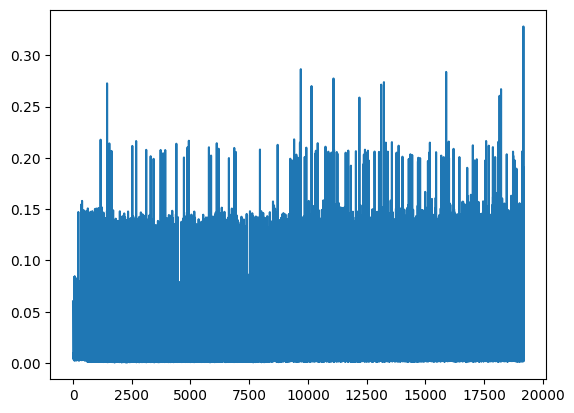

In [13]:
losses_np = np.asarray(losses)
plt.figure()
plt.plot(losses_np)

## Evaluate (without exploration)

Please look at the behavior for a small number of episodes

In [ ]:
env_eval = gym.make(env_name, render_mode="human")
if isinstance(env.action_space, spaces.Box):
    env_eval = DiscreteActionWrapper(env_eval,5)

In [ ]:
test_stats = []
episodes=50
# env_ = env    # without rendering
env_ = env_eval # with rendering

for i in range(episodes):
    total_reward = 0
    ob, _info = env_.reset()
    for t in range(max_steps):
        done = False        
        a = q_agent.act(ob, eps=0.0)
        (ob_new, reward, done, trunc, _info) = env_.step(a)
        total_reward+= reward
        ob=ob_new        
        if done: break    
    test_stats.append([i,total_reward,t+1])        

Evaluate mean and standard deviation of performance 

(for the Pendulum: an average return around -30 or better should be achieved)

(for the CartPendulum it is possible to get 200)

In [ ]:
test_stats_np = np.array(test_stats)
print(np.mean(test_stats_np[:,1]), "+-", np.std(test_stats_np[:,1]))

# Visualize

Visualization of the value function.

In [ ]:
Adapt the value_function plotting from last time to plot the maxQ value

## Pendulum Env

Observation space:

0 angle

1 angular velocity

Do that for the pendulum function. Does it look like you expect?

Do that for the pendulum function. Does it look like you expect

## Cartpole Env

Observation space:
 
0       Cart Position             -4.8                    4.8

1       Cart Velocity             -Inf                    Inf

2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)

3       Pole Angular Velocity     -Inf                    Inf

Try to adapt the plotting function that it also works in higher input spaces where all other inputs are 0

In [ ]:
figQ = plot_Q_function_generic(q_agent.Q, input_dims=o_space.shape[0], plot_dim1=0, plot_dim2=2, 
                       label_dim1="Cart Pos", label_dim2="Pole Angle")

In [ ]:
figQ = plot_Q_function_generic(q_agent.Q, input_dims=o_space.shape[0], plot_dim1=0, plot_dim2=1, 
                       label_dim1="Cart Pos", label_dim2="Cart Vel")

In [ ]:
figQ = plot_Q_function_generic(q_agent.Q, input_dims=o_space.shape[0], plot_dim1=2, plot_dim2=3, 
                       label_dim1="Pol Angle", label_dim2="Pole Vel")

In [ ]:
# env_name = 'Acrobot-v1'
# env_name = 'MountainCar-v0'
# env_name = 'LunarLander-v2'